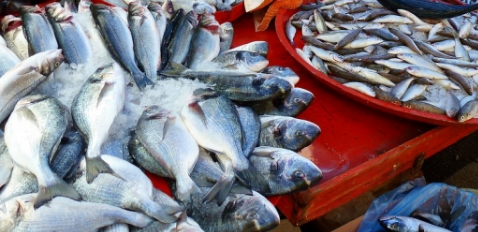

In [2]:
import warnings
warnings.filterwarnings('ignore')


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
fish= pd.read_csv('C:/Users/LOKESH ARUN BHIRUD/Desktop/New folder/Fish.csv')

In [5]:
fish.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [6]:
fish.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
Species    159 non-null object
Weight     159 non-null float64
Length1    159 non-null float64
Length2    159 non-null float64
Length3    159 non-null float64
Height     159 non-null float64
Width      159 non-null float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


In [7]:
fish.describe()

,Weight,Length1,Length2,Length3,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,398.326415,26.247170,28.415723,31.227044,8.970994,4.417486
std,357.978317,9.996441,10.716328,11.610246,4.286208,1.685804
min,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,19.050000,21.000000,23.150000,5.944800,3.385650
50%,273.000000,25.200000,27.300000,29.400000,7.786000,4.248500
75%,650.000000,32.700000,35.500000,39.650000,12.365900,5.584500
max,1650.000000,59.000000,63.400000,68.000000,18.957000,8.142000


In [8]:
fish.shape

(159, 7)

### Comment :
Dataset has 159 rows & 7 columns

# Data Quality Check

Check for NULL/MISSING values

In [9]:
# percentage of missing values in each column
round((100*(fish.isnull().sum())/len(fish)),2)

Species    0.0
Weight     0.0
Length1    0.0
Length2    0.0
Length3    0.0
Height     0.0
Width      0.0
dtype: float64

In [10]:
# percentage of missing values in each row
round((100*(fish.isnull().sum(axis=1))/len(fish)),2).sort_values(ascending= False)

158    0.0
49     0.0
56     0.0
55     0.0
54     0.0
      ... 
104    0.0
103    0.0
102    0.0
101    0.0
0      0.0
Length: 159, dtype: float64

### Comments
- There are no missing / Null values either in columns or rows

# Duplicate Check

In [11]:
fish_dub=fish.copy()

In [12]:
fish_dub.shape

(159, 7)

In [13]:
fish.shape

(159, 7)

### Comments

- The shape after running the drop duplicate command is same as the original dataframe.

- Hence we can conclude that there were zero duplicate values in the dataset.

# Data Cleaning


- Checking value_counts() for entire dataframe.

- This will help to identify any Unknow/Junk values present in the dataset.

In [14]:
for col in fish:
    print(fish[col].value_counts(ascending=False), '\n\n\n')

Perch        56
Bream        35
Roach        20
Pike         17
Smelt        14
Parkki       11
Whitefish     6
Name: Species, dtype: int64 



300.0     6
500.0     5
120.0     5
700.0     5
1000.0    5
         ..
556.0     1
840.0     1
690.0     1
345.0     1
242.0     1
Name: Weight, Length: 101, dtype: int64 



19.0    6
20.0    5
22.0    4
20.5    4
24.0    3
       ..
10.8    1
44.8    1
48.3    1
10.7    1
30.9    1
Name: Length1, Length: 116, dtype: int64 



22.0    7
35.0    6
40.0    5
22.5    5
21.0    4
       ..
37.3    1
11.2    1
12.2    1
24.6    1
56.0    1
Name: Length2, Length: 93, dtype: int64 



23.5    5
36.2    3
45.5    3
25.0    3
22.5    3
       ..
45.8    1
13.2    1
20.8    1
15.2    1
30.0    1
Name: Length3, Length: 124, dtype: int64 



11.1366    2
9.6000     2
2.2139     2
5.6925     2
6.1100     2
          ..
16.3618    1
17.6235    1
11.9328    1
12.6040    1
5.8750     1
Name: Height, Length: 154, dtype: int64 



3.5250    3
4.3350    2
3.624

# Creating Dummy Variables

- We will create DUMMY variables for a categorical variable:  Species
- Before creating dummy variables, we will have to convert them into 'category' data types.

In [15]:
# Check the datatypes before convertion
fish.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
Species    159 non-null object
Weight     159 non-null float64
Length1    159 non-null float64
Length2    159 non-null float64
Length3    159 non-null float64
Height     159 non-null float64
Width      159 non-null float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


In [16]:
# Convert to 'category' data type

fish['Species']=fish['Species'].astype('category')

In [17]:
# This code does 3 things:
# 1) Create Dummy variable
# 2) Drop original variable for which the dummy was created
# 3) Drop first dummy variable for each set of dummies created.

fish_new = pd.get_dummies(fish, drop_first=True)
fish_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 12 columns):
Weight               159 non-null float64
Length1              159 non-null float64
Length2              159 non-null float64
Length3              159 non-null float64
Height               159 non-null float64
Width                159 non-null float64
Species_Parkki       159 non-null uint8
Species_Perch        159 non-null uint8
Species_Pike         159 non-null uint8
Species_Roach        159 non-null uint8
Species_Smelt        159 non-null uint8
Species_Whitefish    159 non-null uint8
dtypes: float64(6), uint8(6)
memory usage: 8.5 KB


In [18]:
fish_new.shape

(159, 12)

# SPLITTING THE DATA

- Splitting the data to Train and Test: - We will now split the data into TRAIN and TEST (70:30 ratio)
- We will use train_test_split method from sklearn package for this

In [19]:
# Check the shape before spliting

fish_new.shape

(159, 12)

In [20]:
# Check the info before spliting

fish_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 12 columns):
Weight               159 non-null float64
Length1              159 non-null float64
Length2              159 non-null float64
Length3              159 non-null float64
Height               159 non-null float64
Width                159 non-null float64
Species_Parkki       159 non-null uint8
Species_Perch        159 non-null uint8
Species_Pike         159 non-null uint8
Species_Roach        159 non-null uint8
Species_Smelt        159 non-null uint8
Species_Whitefish    159 non-null uint8
dtypes: float64(6), uint8(6)
memory usage: 8.5 KB


In [21]:
from sklearn.model_selection import train_test_split

# We should specify 'random_state' so that the train and test data set always have the same rows, respectively

np.random.seed(0)
df_train, df_test = train_test_split(fish_new, train_size = 0.70, test_size = 0.30, random_state = 100)

- Verify the info and shape of the dataframes after split:

In [22]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 111 entries, 6 to 8
Data columns (total 12 columns):
Weight               111 non-null float64
Length1              111 non-null float64
Length2              111 non-null float64
Length3              111 non-null float64
Height               111 non-null float64
Width                111 non-null float64
Species_Parkki       111 non-null uint8
Species_Perch        111 non-null uint8
Species_Pike         111 non-null uint8
Species_Roach        111 non-null uint8
Species_Smelt        111 non-null uint8
Species_Whitefish    111 non-null uint8
dtypes: float64(6), uint8(6)
memory usage: 6.7 KB


In [23]:
df_train.shape

(111, 12)

In [24]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48 entries, 45 to 37
Data columns (total 12 columns):
Weight               48 non-null float64
Length1              48 non-null float64
Length2              48 non-null float64
Length3              48 non-null float64
Height               48 non-null float64
Width                48 non-null float64
Species_Parkki       48 non-null uint8
Species_Perch        48 non-null uint8
Species_Pike         48 non-null uint8
Species_Roach        48 non-null uint8
Species_Smelt        48 non-null uint8
Species_Whitefish    48 non-null uint8
dtypes: float64(6), uint8(6)
memory usage: 2.9 KB


In [25]:
df_test.shape


(48, 12)

# EXPLORATORY DATA ANALYSIS

- We need to perform the EDA on TRAINING (df_train) Dataset.

## Visualising Numeric Variables
- Let's make a pairplot of all the numeric variables.

In [26]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 111 entries, 6 to 8
Data columns (total 12 columns):
Weight               111 non-null float64
Length1              111 non-null float64
Length2              111 non-null float64
Length3              111 non-null float64
Height               111 non-null float64
Width                111 non-null float64
Species_Parkki       111 non-null uint8
Species_Perch        111 non-null uint8
Species_Pike         111 non-null uint8
Species_Roach        111 non-null uint8
Species_Smelt        111 non-null uint8
Species_Whitefish    111 non-null uint8
dtypes: float64(6), uint8(6)
memory usage: 6.7 KB


In [27]:
df_train.columns

Index(['Weight', 'Length1', 'Length2', 'Length3', 'Height', 'Width',
       'Species_Parkki', 'Species_Perch', 'Species_Pike', 'Species_Roach',
       'Species_Smelt', 'Species_Whitefish'],
      dtype='object')

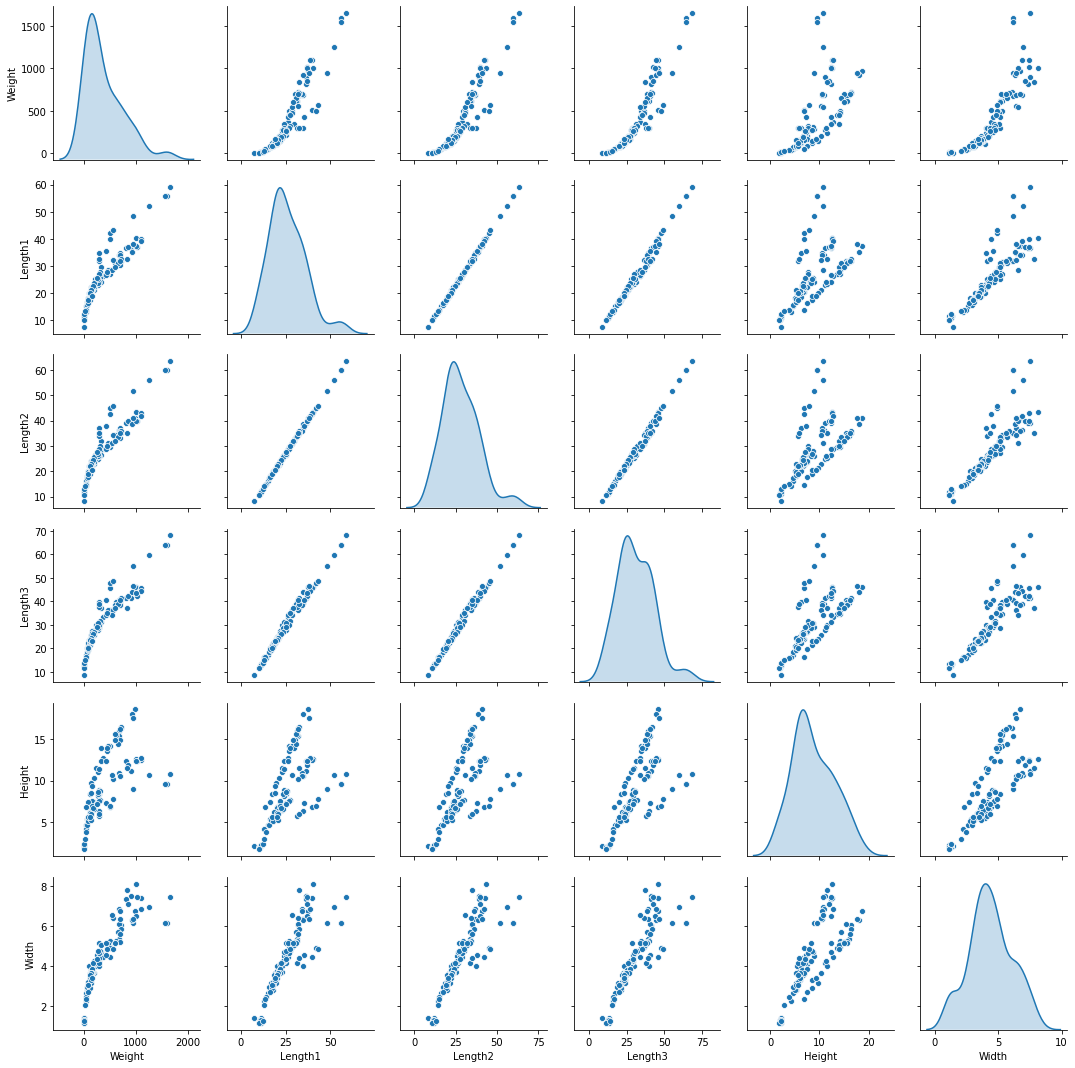

In [28]:
# Create a new dataframe of only numeric variables:

fish_num=df_train[[ 'Weight', 'Length1', 'Length2', 'Length3', 'Height', 'Width']]

sns.pairplot(fish_num, diag_kind='kde')
plt.show()

### Comment

- The above Pair-Plot tells us that there is a LINEAR RELATION between 'Length1', 'Length2', 'Length3', 'Height', 'Width' and 'Weight'

# Visualising Catagorical Variables

In [29]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 111 entries, 6 to 8
Data columns (total 12 columns):
Weight               111 non-null float64
Length1              111 non-null float64
Length2              111 non-null float64
Length3              111 non-null float64
Height               111 non-null float64
Width                111 non-null float64
Species_Parkki       111 non-null uint8
Species_Perch        111 non-null uint8
Species_Pike         111 non-null uint8
Species_Roach        111 non-null uint8
Species_Smelt        111 non-null uint8
Species_Whitefish    111 non-null uint8
dtypes: float64(6), uint8(6)
memory usage: 11.7 KB


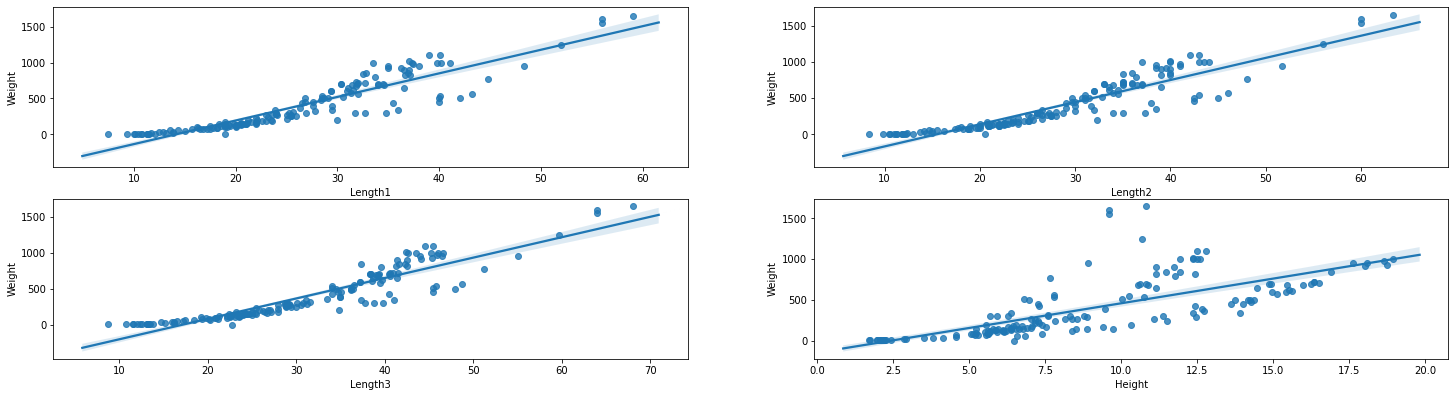

In [30]:
# Build regplot of all categorical variables (before creating dummies) againt the target variable 'wight' 
# to see how each of the predictor variable stackup against the target variable.
plt.figure(figsize=(25, 10))
plt.subplot(3,2,1)
sns.regplot(x = 'Length1', y = 'Weight', data = fish)
plt.subplot(3,2,2)
sns.regplot(x = 'Length2', y = 'Weight', data = fish)
plt.subplot(3,2,3)
sns.regplot(x = 'Length3', y = 'Weight', data = fish)
plt.subplot(3,2,4)
sns.regplot(x = 'Height', y = 'Weight', data = fish)
plt.show()

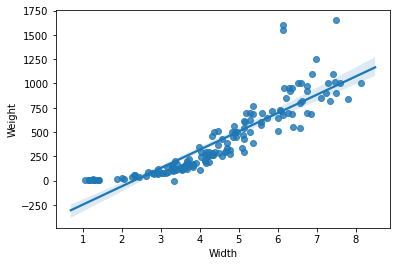

In [31]:
plt.figure()
sns.regplot(x = 'Width', y = 'Weight', data = fish);
plt.show()

### Comment

The solid line is evidently the linear regression model fit between following

- 'Length1' vs 'Weight'
- 'Length2' vs 'Weight'
- 'Length3' vs 'Weight'
- 'Height' vs 'Weight'
- 'Width' vs 'Weight'

# Correlation Matrix

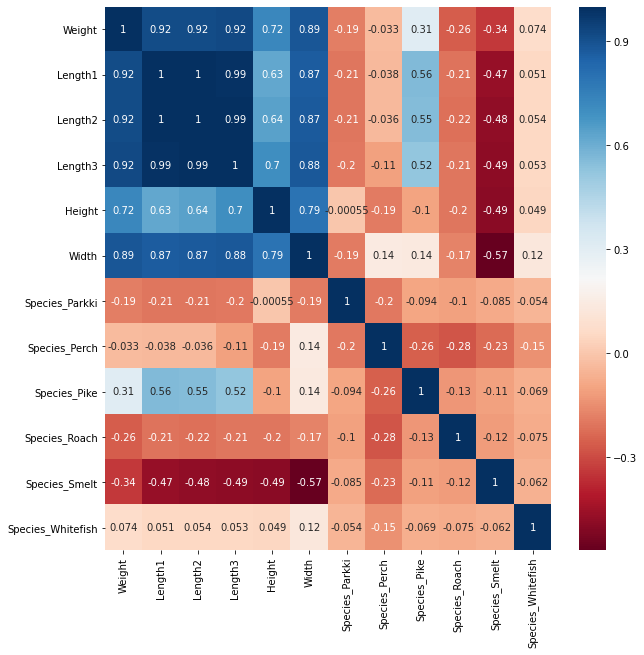

In [32]:
# Let's check the correlation coefficients to see which variables are highly correlated. Note:
# here we are considering only those variables (dataframe: insurance_new) that were chosen for analysis

plt.figure(figsize = (10,10))
sns.heatmap(fish_new.corr(), annot = True, cmap="RdBu")
plt.show()

# Comment
- The heatmap clearly shows which all variable are multicollinear in nature, and which variable have high collinearity with the target variable.
- We will refer this map back-and-forth while building the linear model so as to validate different correlated values along with VIF & p-value, for identifying the correct variable to select/eliminate from the model.

# RESCALING THE FEATURES

In [33]:
from sklearn.preprocessing import MinMaxScaler

In [34]:
scaler= MinMaxScaler()

In [35]:
df_train.head()

,Weight,Length1,Length2,Length3,Height,Width,Species_Parkki,Species_Perch,Species_Pike,Species_Roach,Species_Smelt,Species_Whitefish
6,500.0,26.8,29.7,34.5,14.1795,5.2785,0,0,0,0,0,0
25,725.0,31.8,35.0,40.9,16.3600,6.0532,0,0,0,0,0,0
21,685.0,31.4,34.0,39.2,15.9936,5.3704,0,0,0,0,0,0
75,51.5,15.0,16.2,17.2,4.5924,2.6316,0,1,0,0,0,0
84,125.0,19.0,21.0,22.5,5.6925,3.6675,0,1,0,0,0,0


In [36]:
df_train.columns

Index(['Weight', 'Length1', 'Length2', 'Length3', 'Height', 'Width',
       'Species_Parkki', 'Species_Perch', 'Species_Pike', 'Species_Roach',
       'Species_Smelt', 'Species_Whitefish'],
      dtype='object')

In [37]:
# Apply scaler() to all the numeric variables

num_vars = ['Length1', 'Length2', 'Length3', 'Height', 'Width']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])


In [38]:
# Checking values after scaling
df_train.head()

,Weight,Length1,Length2,Length3,Height,Width,Species_Parkki,Species_Perch,Species_Pike,Species_Roach,Species_Smelt,Species_Whitefish
6,500.0,0.374757,0.387273,0.434122,0.736446,0.590554,0,0,0,0,0,0
25,725.0,0.471845,0.483636,0.542230,0.865417,0.701327,0,0,0,0,0,0
21,685.0,0.464078,0.465455,0.513514,0.843745,0.603695,0,0,0,0,0,0
75,51.5,0.145631,0.141818,0.141892,0.169397,0.212080,0,1,0,0,0,0
84,125.0,0.223301,0.229091,0.231419,0.234465,0.360201,0,1,0,0,0,0


In [39]:
df_train.describe()

,Weight,Length1,Length2,Length3,Height,Width,Species_Parkki,Species_Perch,Species_Pike,Species_Roach,Species_Smelt,Species_Whitefish
count,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000
mean,395.444144,0.361847,0.361818,0.376446,0.421112,0.466662,0.081081,0.360360,0.108108,0.117117,0.081081,0.045045
std,370.471174,0.199643,0.200158,0.200944,0.244896,0.239262,0.274198,0.482282,0.311925,0.323018,0.274198,0.208344
min,5.900000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,120.000000,0.227184,0.229091,0.245777,0.246516,0.323231,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,272.000000,0.322330,0.329091,0.341216,0.358644,0.443148,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,615.000000,0.474757,0.483636,0.511824,0.615893,0.597239,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,1650.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# BUILDING A LINEAR MODEL

## Dividing into X and Y sets for the model building

In [40]:
y_train = df_train.pop('Weight')
X_train = df_train

### RFE
Recursive feature elimination: We will be using the LinearRegression function from SciKit Learn for its compatibility with RFE (which is a utility from sklearn)

In [41]:
#Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [42]:
# Running RFE with the output number of the variable equal to 6
lm= LinearRegression()
lm.fit(X_train,y_train)
rfe= RFE(lm,6)
rfe=rfe.fit(X_train,y_train)

In [43]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('Length1', True, 1),
 ('Length2', True, 1),
 ('Length3', True, 1),
 ('Height', True, 1),
 ('Width', False, 5),
 ('Species_Parkki', False, 2),
 ('Species_Perch', False, 4),
 ('Species_Pike', True, 1),
 ('Species_Roach', False, 3),
 ('Species_Smelt', True, 1),
 ('Species_Whitefish', False, 6)]

In [44]:
col=X_train.columns[rfe.support_]
col


Index(['Length1', 'Length2', 'Length3', 'Height', 'Species_Pike',
       'Species_Smelt'],
      dtype='object')

In [45]:
X_train.columns[~rfe.support_]

Index(['Width', 'Species_Parkki', 'Species_Perch', 'Species_Roach',
       'Species_Whitefish'],
      dtype='object')

In [46]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

# Building Linear Model using 'STATS MODEL'

## Model 1

### VIF

In [47]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,Length2,9910.62
0,Length1,7992.47
2,Length3,1926.67
3,Height,61.94
4,Species_Pike,5.97
5,Species_Smelt,1.45


In [48]:
import statsmodels.api as sm

# Add a constant
X_train_lm1 = sm.add_constant(X_train_rfe)

# Create a first fitted model
lr1 = sm.OLS(y_train, X_train_lm1).fit()

In [49]:
# Check the parameters obtained

lr1.params

const            -390.352961
Length1          -938.437859
Length2          3230.299325
Length3           -98.698510
Height             20.925668
Species_Pike     -342.905143
Species_Smelt     271.341705
dtype: float64

In [50]:
# Print a summary of the linear regression model obtained
print(lr1.summary())

                            OLS Regression Results                            
Dep. Variable:                 Weight   R-squared:                       0.934
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                     246.3
Date:                Sat, 25 Jul 2020   Prob (F-statistic):           4.21e-59
Time:                        16:47:27   Log-Likelihood:                -662.46
No. Observations:                 111   AIC:                             1339.
Df Residuals:                     104   BIC:                             1358.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          -390.3530     26.022    -15.001

## Model 2

- Removing the variable 'Length3' based on its High p-value

In [51]:
X_train_new = X_train_rfe.drop(["Length3"], axis = 1)

### VIF 

In [52]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,Length2,8281.01
0,Length1,7979.89
2,Height,16.71
3,Species_Pike,3.52
4,Species_Smelt,1.30


In [53]:
# Add a constant
X_train_lm2 = sm.add_constant(X_train_new)

# Create a first fitted model
lr2 = sm.OLS(y_train, X_train_lm2).fit()

In [54]:
# Check the parameters obtained

lr2.params

const            -390.812922
Length1          -927.435660
Length2          3134.675618
Height              7.902951
Species_Pike     -347.685749
Species_Smelt     270.397627
dtype: float64

In [55]:
# Print a summary of the linear regression model obtained
print(lr2.summary())

                            OLS Regression Results                            
Dep. Variable:                 Weight   R-squared:                       0.934
Model:                            OLS   Adj. R-squared:                  0.931
Method:                 Least Squares   F-statistic:                     298.4
Date:                Sat, 25 Jul 2020   Prob (F-statistic):           2.32e-60
Time:                        16:47:28   Log-Likelihood:                -662.47
No. Observations:                 111   AIC:                             1337.
Df Residuals:                     105   BIC:                             1353.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          -390.8129     25.506    -15.323

## Model 3

- Removing the variable 'Height' based on its High p-value

In [56]:
X_train_new = X_train_new.drop(["Height"], axis = 1)

### VIF

In [57]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,Length1,6602.24
1,Length2,6552.08
2,Species_Pike,1.73
3,Species_Smelt,1.29


In [58]:
# Add a constant
X_train_lm3 = sm.add_constant(X_train_new)

# Create a first fitted model
lr3 = sm.OLS(y_train, X_train_lm3).fit()

In [59]:
# Check the parameters obtained

lr3.params

const            -390.403584
Length1         -1012.335722
Length2          3228.707206
Species_Pike     -351.226683
Species_Smelt     270.397742
dtype: float64

In [60]:
# Print a summary of the linear regression model obtained
print(lr3.summary())

                            OLS Regression Results                            
Dep. Variable:                 Weight   R-squared:                       0.934
Model:                            OLS   Adj. R-squared:                  0.932
Method:                 Least Squares   F-statistic:                     376.5
Date:                Sat, 25 Jul 2020   Prob (F-statistic):           1.13e-61
Time:                        16:47:29   Log-Likelihood:                -662.47
No. Observations:                 111   AIC:                             1335.
Df Residuals:                     106   BIC:                             1348.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          -390.4036     25.061    -15.578

## Model 4

- Removing the variable 'Length1' based on its High p-value

In [61]:
X_train_new = X_train_new.drop(["Length1"], axis = 1)

### VIF

In [62]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,Length2,1.47
1,Species_Pike,1.47
2,Species_Smelt,1.00


In [63]:
# Add a constant
X_train_lm4 = sm.add_constant(X_train_new)

# Create a first fitted model
lr4 = sm.OLS(y_train, X_train_lm4).fit()

In [64]:
# Check the parameters obtained

lr4.params

const            -390.551562
Length2          2221.235585
Species_Pike     -359.259616
Species_Smelt     260.864342
dtype: float64

In [65]:
# Print a summary of the linear regression model obtained
print(lr4.summary())

                            OLS Regression Results                            
Dep. Variable:                 Weight   R-squared:                       0.934
Model:                            OLS   Adj. R-squared:                  0.932
Method:                 Least Squares   F-statistic:                     505.2
Date:                Sat, 25 Jul 2020   Prob (F-statistic):           5.39e-63
Time:                        16:47:30   Log-Likelihood:                -662.64
No. Observations:                 111   AIC:                             1333.
Df Residuals:                     107   BIC:                             1344.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          -390.5516     24.979    -15.635

### Comments
- This model looks good, as there seems to be VERY LOW Multicollinearity between the predictors and the p-values for all the predictors seems to be significant. For now, we will consider this as our final model (unless the Test data metrics are not significantly close to this number).

# Final Model Interpretation 

Hypothesis Testing:
Hypothesis testing states that:
H0:B1=B2=...=Bn=0 H1: at least one Bi!=0

lr4 model coefficient values
- const            -390.551562
- Length2          2221.235585
- Species_Pike     -359.259616
- Species_Smelt     260.864342

### Comment

- From the lr4 model summary, it is evident that all our coefficients are not equal to zero which means We REJECT the NULL HYPOTHESIS

# F Statistics


F-Statistics is used for testing the overall significance of the Model: Higher the F-Statistics, more significant the Model is.
- F-statistic:                     505.2
- Prob (F-statistic):           5.39e-63

> The F-Statistics value of 505.2 (which is greater than 1) and the p-value of '~0.0000' states that the overall model is significant

# The equation of best fitted surface based on model lr4:

Weight = - 390.551562 + (Length2 * 2221.235585) - (Species_Pike  *  359.259616) + (Species_Smelt  *   260.864342)


## Interpretation of Coefficients:
- Length2 : A coefficient value of ‘2221.235585’ indicated that a unit increase in length variable, increases the weight numbers by 2221.235585 units.
- Species_Pike: A coefficient value of ‘359.259616’ indicated that a unit increase in bmi variable, decreases the weight numbers by 359.259616 units.
- Species_Smelt: A coefficient value of ‘260.864342’ indicated that a unit increase in Species_Smelt variable, increases the weight numbers by 260.864342 units.

# ASSUMPTIONS

## Error terms are normally distributed with mean zero (not X, Y)
- Residual Analysis Of Training Data

In [66]:
y_train_pred = lr4.predict(X_train_lm4)

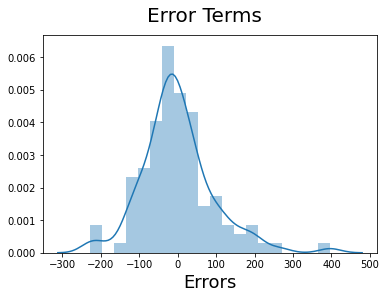

In [67]:
res = y_train-y_train_pred
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((res), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18) ;

# Comment
- From the above histogram, we could see that the Residuals are normally distributed. Hence our assumption for Linear Regression is valid.

## There is a linear relationship between X and Y

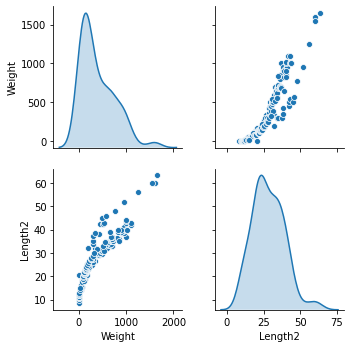

In [68]:
fish_new=fish_new[[ 'Weight', 'Length2']]

sns.pairplot(fish_new, diag_kind='kde')
plt.show()

## Comment 
- The above Pair-Plot tells us that there is a LINEAR RELATION between 'Length2' and 'Weight'


## There is No Multicollinearity between the predictor variables

In [69]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,Length2,1.47
1,Species_Pike,1.47
2,Species_Smelt,1.00


### Comments
- From the VIF calculation we could find that there is no multicollinearity existing between the predictor variables, as all the values are within permissible range of below

# MAKING PREDICTION USING FINAL MODEL

Now that we have fitted the model and checked the assumptions, it's time to go ahead and make predictions using the final model (lr4)

### Applying the scaling on the test sets

In [70]:
# Apply scaler() to all numeric variables in test dataset. Note: we will only use scaler.transform, 
# as we want to use the metrics that the model learned from the training data to be applied on the test data. 
# In other words, we want to prevent the information leak from train to test dataset.

num_vars = ['Length1', 'Length2', 'Length3', 'Height', 'Width']

df_test[num_vars] = scaler.transform(df_test[num_vars])

In [71]:
df_test.head()

,Weight,Length1,Length2,Length3,Height,Width,Species_Parkki,Species_Perch,Species_Pike,Species_Roach,Species_Smelt,Species_Whitefish
45,160.0,0.252427,0.256364,0.278716,0.313775,0.382049,0,0,0,1,0,0
11,500.0,0.411650,0.410909,0.462838,0.747797,0.524222,0,0,0,0,0,0
127,1000.0,0.652427,0.647273,0.638514,0.636446,0.921900,0,1,0,0,0,0
15,600.0,0.425243,0.429091,0.479730,0.810883,0.633665,0,0,0,0,0,0
7,390.0,0.390291,0.392727,0.442568,0.647164,0.506406,0,0,0,0,0,0


In [72]:
df_test.describe()

,Weight,Length1,Length2,Length3,Height,Width,Species_Parkki,Species_Perch,Species_Pike,Species_Roach,Species_Smelt,Species_Whitefish
count,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000
mean,404.991667,0.369053,0.368788,0.384361,0.445182,0.469237,0.041667,0.333333,0.104167,0.145833,0.104167,0.020833
std,330.924770,0.182589,0.183910,0.186420,0.274375,0.247681,0.201941,0.476393,0.308709,0.356674,0.308709,0.144338
min,0.000000,0.034951,0.025455,0.033784,0.000615,-0.014413,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,125.000000,0.224757,0.228182,0.236486,0.267332,0.317605,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,317.500000,0.400971,0.401818,0.432432,0.355155,0.452650,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,700.000000,0.512621,0.520000,0.545608,0.636056,0.694685,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,1000.000000,0.724272,0.720000,0.716216,1.019022,0.921900,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Dividing into X_test and y_test

In [73]:
 y_test = df_test.pop('Weight')
X_test = df_test
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48 entries, 45 to 37
Data columns (total 11 columns):
Length1              48 non-null float64
Length2              48 non-null float64
Length3              48 non-null float64
Height               48 non-null float64
Width                48 non-null float64
Species_Parkki       48 non-null uint8
Species_Perch        48 non-null uint8
Species_Pike         48 non-null uint8
Species_Roach        48 non-null uint8
Species_Smelt        48 non-null uint8
Species_Whitefish    48 non-null uint8
dtypes: float64(5), uint8(6)
memory usage: 2.5 KB


In [74]:
#Selecting the variables that were part of final model.
col1=X_train_new.columns
X_test=X_test[col1]
# Adding constant variable to test dataframe
X_test_lm4 = sm.add_constant(X_test)
X_test_lm4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48 entries, 45 to 37
Data columns (total 4 columns):
const            48 non-null float64
Length2          48 non-null float64
Species_Pike     48 non-null uint8
Species_Smelt    48 non-null uint8
dtypes: float64(2), uint8(2)
memory usage: 1.2 KB


In [75]:
# Making predictions using the final model (lr4)

y_pred = lr4.predict(X_test_lm4)

# MODEL EVALUATION

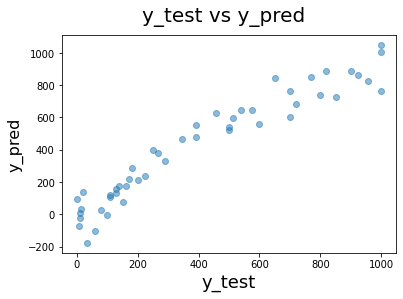

In [76]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred, alpha=.5)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16) 
plt.show()

## R^2 Value for TEST

In [77]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.9143237254054878

## Adjusted R^2 Value for TEST

In [78]:
# We already have the value of R^2 (calculated in above step)

r2=0.9143237254054878 

In [79]:
# Get the shape of X_test
X_test.shape

(48, 3)

In [80]:
# n is number of rows in X

n = X_test.shape[0]


# Number of features (predictors, p) is the shape along axis 1
p = X_test.shape[1]

# We find the Adjusted R-squared using the formula

adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
adjusted_r2

0.9084821612285892

# Final Result Comparison

- Train R^2 :0.934
- Train Adjusted R^2 :  0.932
- Test R^2 :0.914
- Test Adjusted R^2 :0.908
This seems to be a really good model that can very well 'Generalize' various datasets.

# FINAL REPORT

As per our final Model, the top predictor variables that influences the Weight are:
- Length2 : A coefficient value of ‘2221.235585’ indicated that a unit increase in length variable, increases the weight numbers by 2221.235585 units.
- Species_Pike: A coefficient value of ‘359.259616’ indicated that a unit increase in Species_Pike variable, decreases the weight numbers by 359.259616 units.
- Species_Smelt: A coefficient value of ‘260.864342’ indicated that a unit increase in Species_Smelt variable, increases the weight numbers by 260.864342 units.
